# Decision Tree Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('train.csv')

In [ ]:
dataset.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
dataset.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
dataset = dataset.reindex(columns=['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF', 'Machine failure'])

In [ ]:
dataset

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


<ipython-input-8-a59da5e6e44c>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


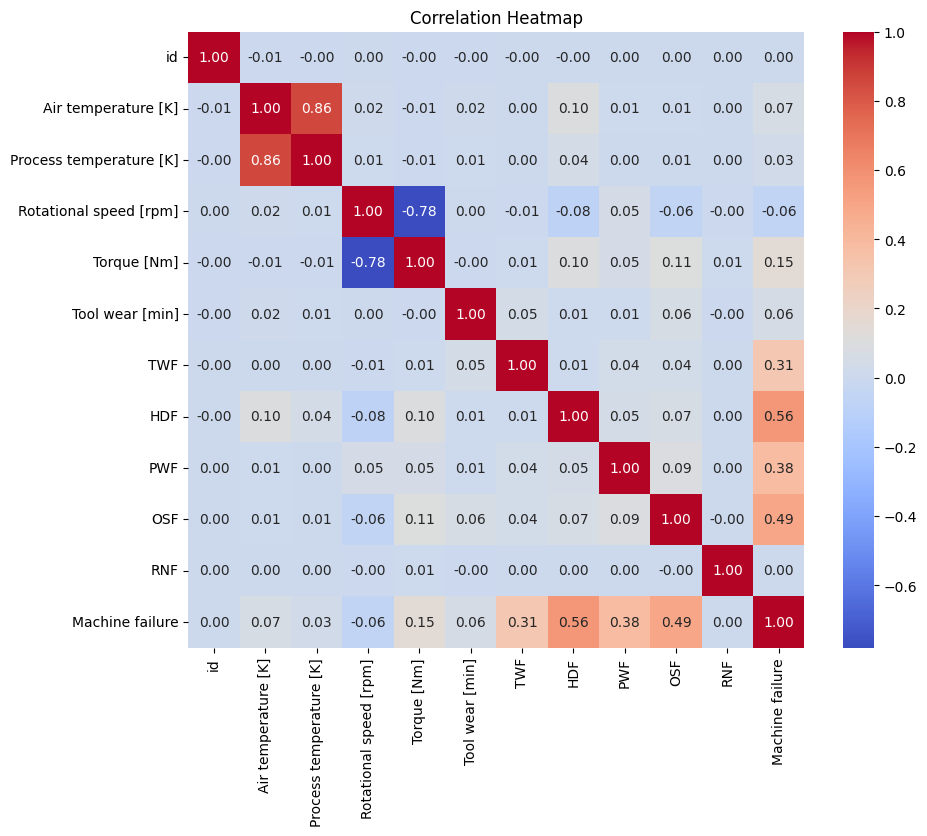

In [ ]:
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame (assuming the data is already in a DataFrame)
# For demonstration purposes, let's assume the DataFrame is named 'data'
# Replace 'data' with your actual DataFrame name

# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create the correlation heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, ax=ax)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [ ]:
dataset.drop('Product ID', axis=1, inplace=True)

In [ ]:
dataset.head(5)

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Type']= le.fit_transform(dataset['Type'])

In [ ]:
dataset

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,0,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,2,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,0,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,1,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,1,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[0.00000e+00 1.00000e+00 3.00600e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00000e+00 2.00000e+00 3.02600e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.00000e+00 1.00000e+00 2.99300e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [1.36426e+05 1.00000e+00 3.00500e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.36427e+05 1.00000e+00 3.01700e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.36428e+05 1.00000e+00 2.96900e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


In [ ]:
print(y)

[0 0 0 ... 0 0 0]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [ ]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

## Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  6]
 [ 3 29]]


0.91

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


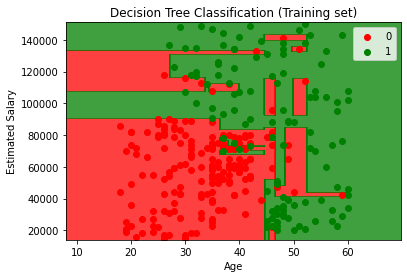

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


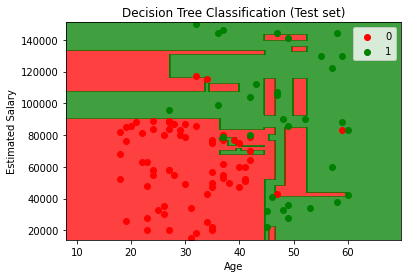

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()